In [13]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(dplyr)

library(ggplot2)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "carlrdata"

3 Hands On: Data Exploration

1 Summarization

In [6]:
#Load the data set carIns final. It already has the imputation of missing values.
#Using the package dplyr, answer the following questions:
#Obtain the number of cars by bodyStyle.

data <- load("/kaggle/input/carlrdata/carIns_final.Rdata")

carIns_final %>% group_by(bodyStyle) %>% count()

bodyStyle,n
<fct>,<int>
convertible,6
hardtop,8
hatchback,70
sedan,96
wagon,25


In [7]:
# Obtain the number of cars by bodyStyle and fuelType.

data <- load("/kaggle/input/carlrdata/carIns_final.Rdata")

carIns_final %>% group_by(bodyStyle,fuelType) %>% count()


bodyStyle,fuelType,n
<fct>,<fct>,<int>
convertible,gas,6
hardtop,diesel,1
hardtop,gas,7
hatchback,diesel,1
hatchback,gas,69
sedan,diesel,15
sedan,gas,81
wagon,diesel,3
wagon,gas,22


In [4]:
#Obtain the mean and the standard deviation of the attribute cityMpg by bodyStyle in ascending order

data <- load("/kaggle/input/carlrdata/carIns_final.Rdata")

carIns_final %>% group_by(bodyStyle) %>% summarize(cityMpg.mean=mean(cityMpg), cityMpg.sd=sd(cityMpg))

bodyStyle,cityMpg.mean,cityMpg.sd
<fct>,<dbl>,<dbl>
convertible,20.50000,3.391165
hardtop,21.62500,5.423165
hatchback,26.31429,7.169870
sedan,25.32292,6.599035
wagon,24.04000,4.217819


In [5]:
#Also by bodyStyle, and for the attributes cityMpg and highwayMpg, obtain the mean, the standard
#deviation, the median and the inter-quartile range.

data <- load("/kaggle/input/carlrdata/carIns_final.Rdata")

carIns_final %>% group_by(bodyStyle) %>% summarize(cityMpg.mean=mean(cityMpg),cityMpg.median=median(cityMpg),
                                                   cityMpg.sd=sd(cityMpg),
                                                   highwayMpg.mean=mean(highwayMpg),
                                                   highwayMpg.median=median(highwayMpg)
                                                  ,highwayMpg.sd=sd(highwayMpg),
                                                   iqr=IQR(highwayMpg))

bodyStyle,cityMpg.mean,cityMpg.median,cityMpg.sd,highwayMpg.mean,highwayMpg.median,highwayMpg.sd,iqr
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
convertible,20.50000,21,3.391165,26.00000,27.0,4.289522,3.00
hardtop,21.62500,23,5.423165,27.25000,27.5,6.088631,5.00
hatchback,26.31429,26,7.169870,32.17143,31.5,7.044314,11.75
sedan,25.32292,25,6.599035,30.83333,30.5,7.174027,11.25
wagon,24.04000,24,4.217819,28.72000,29.0,4.703899,7.00


2 Visualization


#2. Using the package ggplot2, create graphs that you find adequate to answer the following questions.

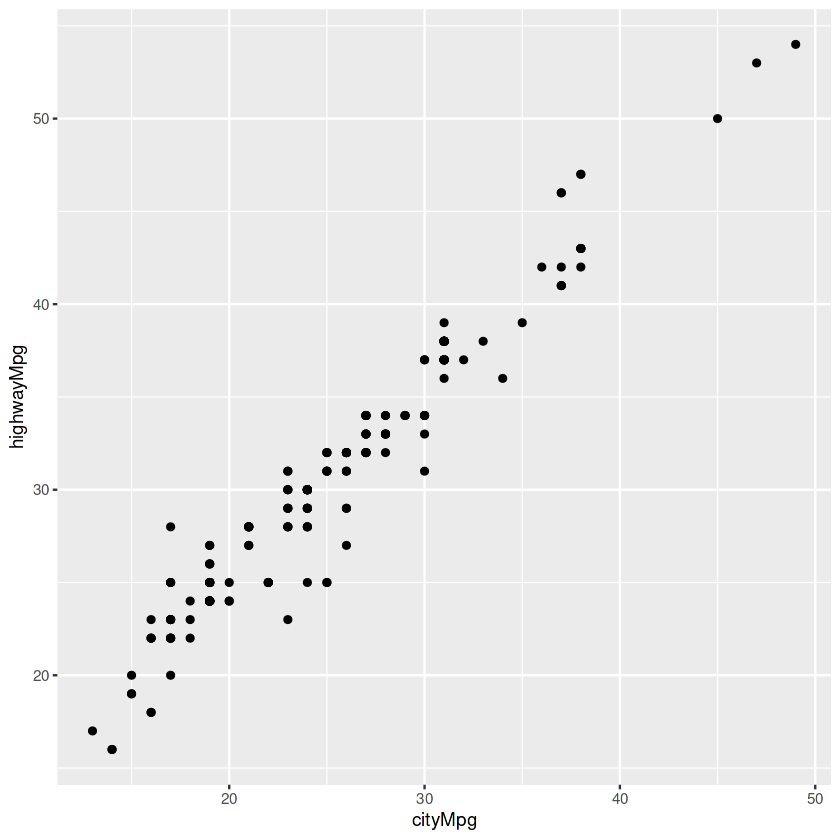

In [24]:
#Show the relationship between the attributes cityMpg and highwayMpg

data <- load("/kaggle/input/carlrdata/carIns_final.Rdata")

ggplot(data = carIns_final, mapping = aes(x = cityMpg, y = highwayMpg)) + geom_point()

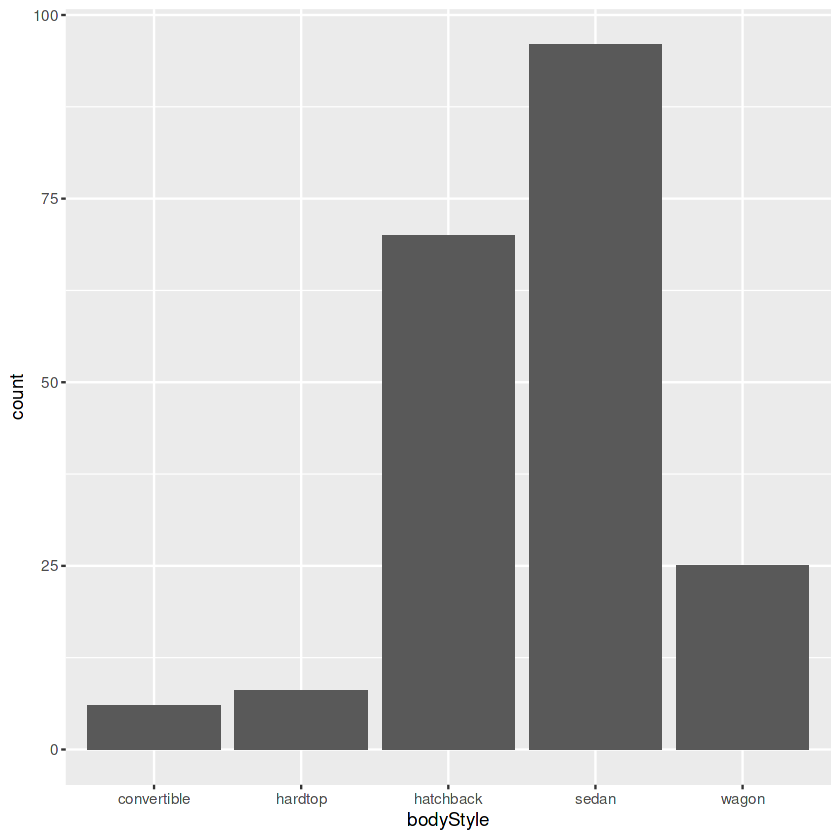

In [30]:
#Show the distribution of cars by bodyStyle.

data <- load("/kaggle/input/carlrdata/carIns_final.Rdata")

ggplot(data = carIns_final, mapping = aes(x =bodyStyle)) + geom_bar()

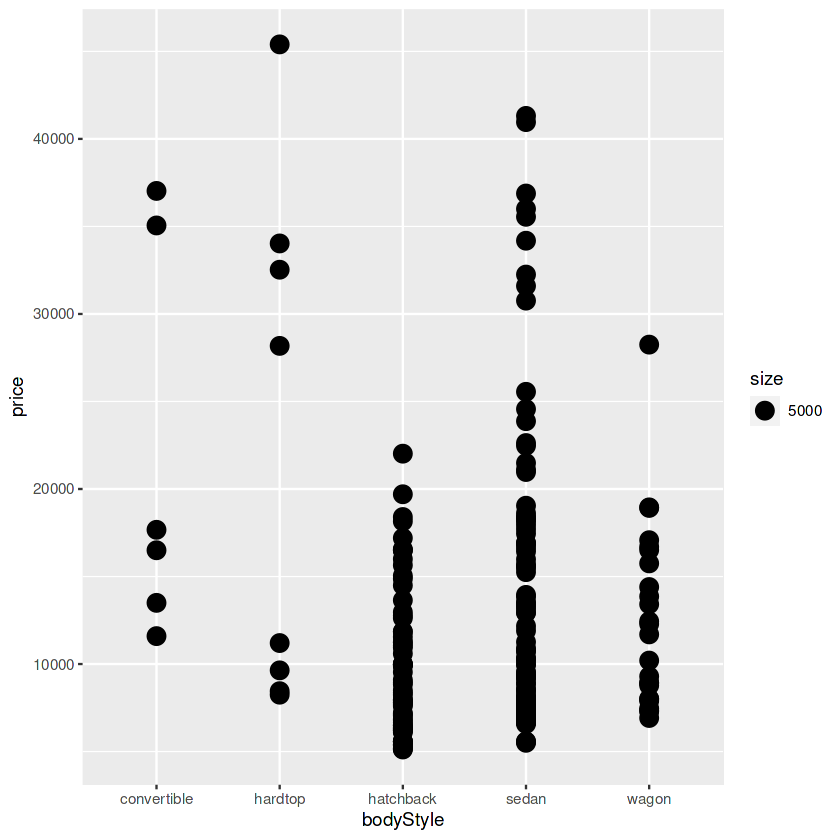

In [50]:
 #Show the distribution of cars by price. Suggestion: create bins of width equal to 5000.

data <- load("/kaggle/input/carlrdata/carIns_final.Rdata")


ggplot(data = carIns_final, mapping = aes(x = bodyStyle, y = price)) + geom_point(aes(size=5000))

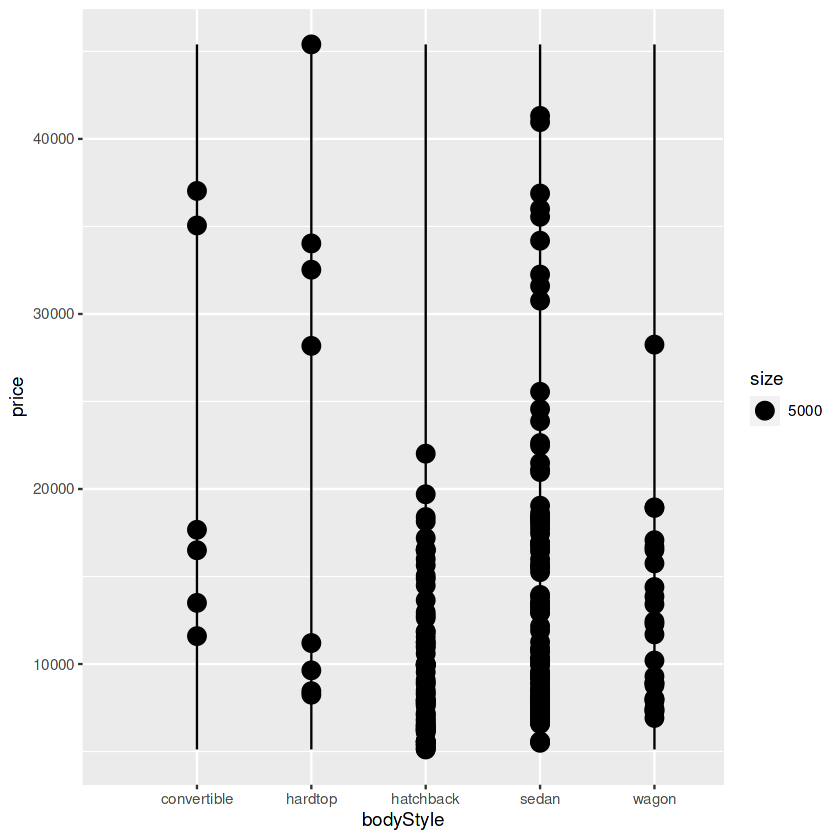

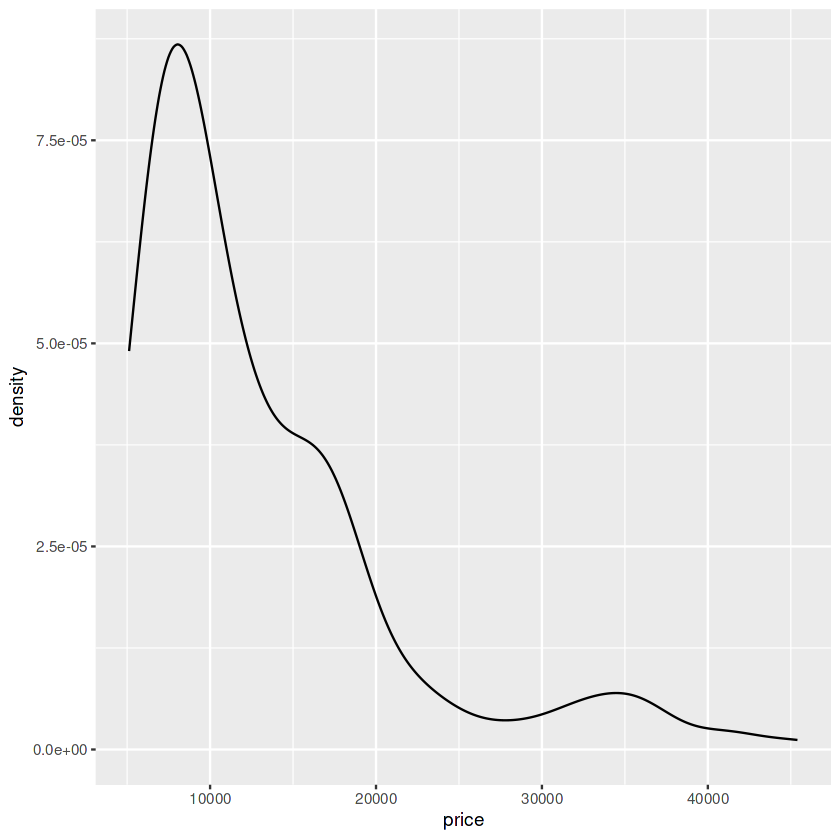

In [54]:
#Add the information of the density estimation to the previous graph.

data <- load("/kaggle/input/carlrdata/carIns_final.Rdata")

ggplot(data = carIns_final, mapping = aes(x = bodyStyle, y =price))+ geom_point(aes(size=5000)) + geom_density()

ggplot(data = carIns_final, mapping = aes(x =price)) + geom_density()


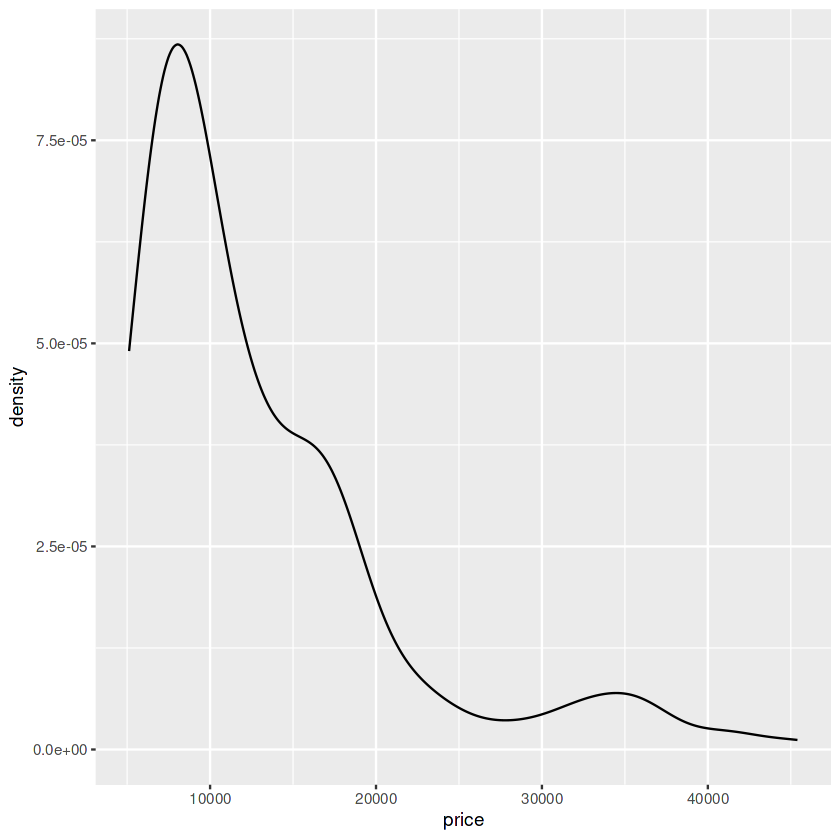

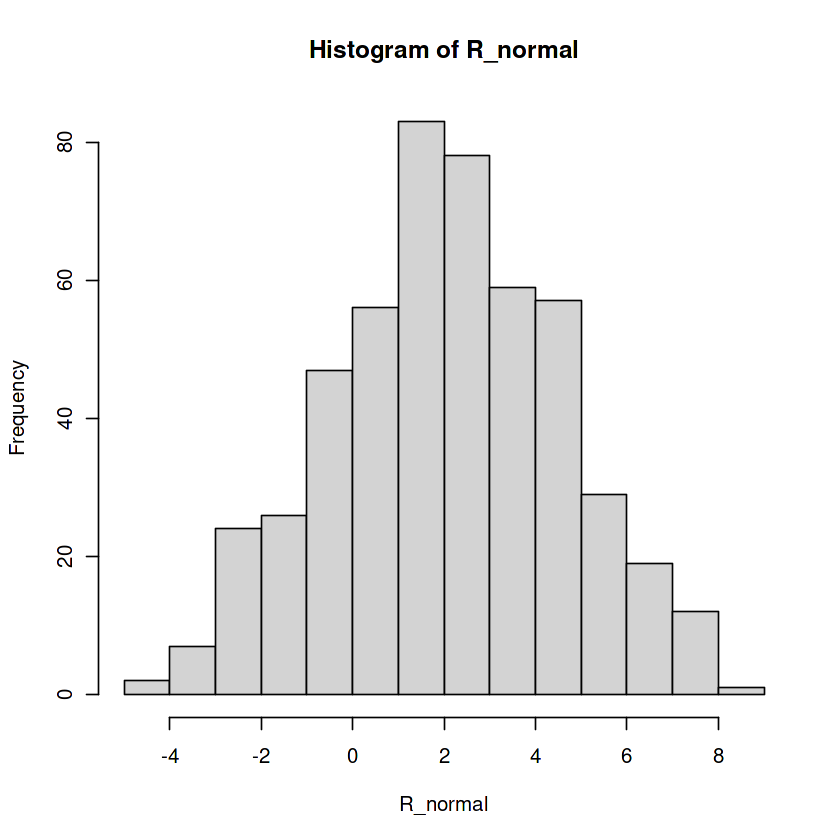

In [80]:
#Check (visually) if it is plausible to consider that price follows a normal distribution.

data <- load("/kaggle/input/carlrdata/carIns_final.Rdata")


ggplot(data = carIns_final, mapping = aes(x =price)) + geom_density()

#no es distribucion normal

R_normal <- rnorm(500, mean = 2, sd = 2.5)

hist(R_normal)


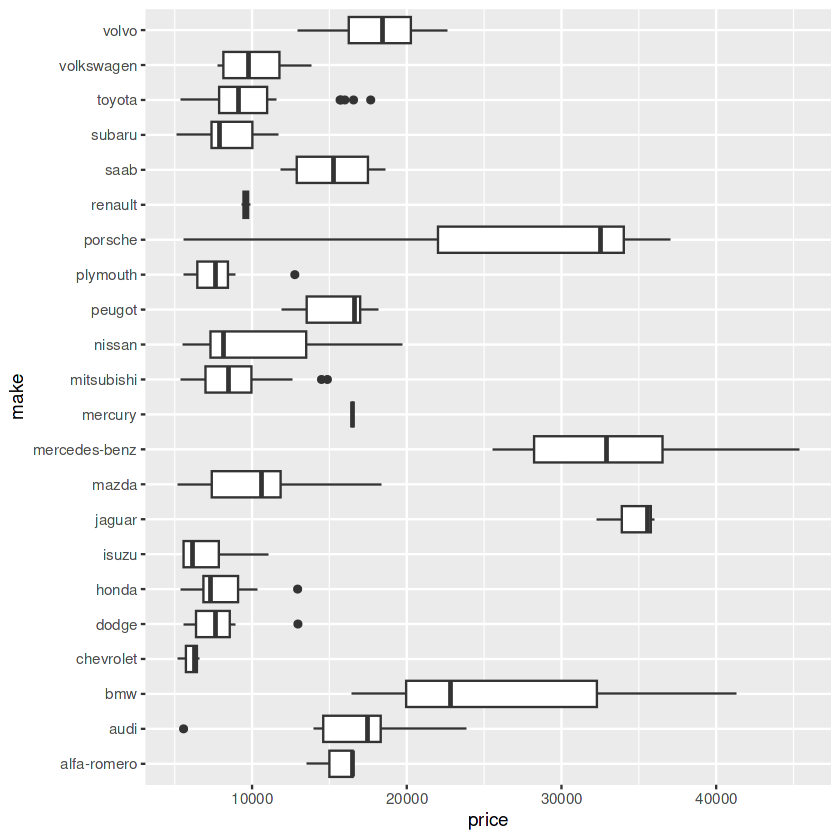

In [83]:
#Show the distribution of price by make attribute. Suggestion: use boxplots and the function coord_flip()

data <- load("/kaggle/input/carlrdata/carIns_final.Rdata")

ggplot(data = carIns_final, mapping = aes(x = make, y = price))+ geom_boxplot() + coord_flip()


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


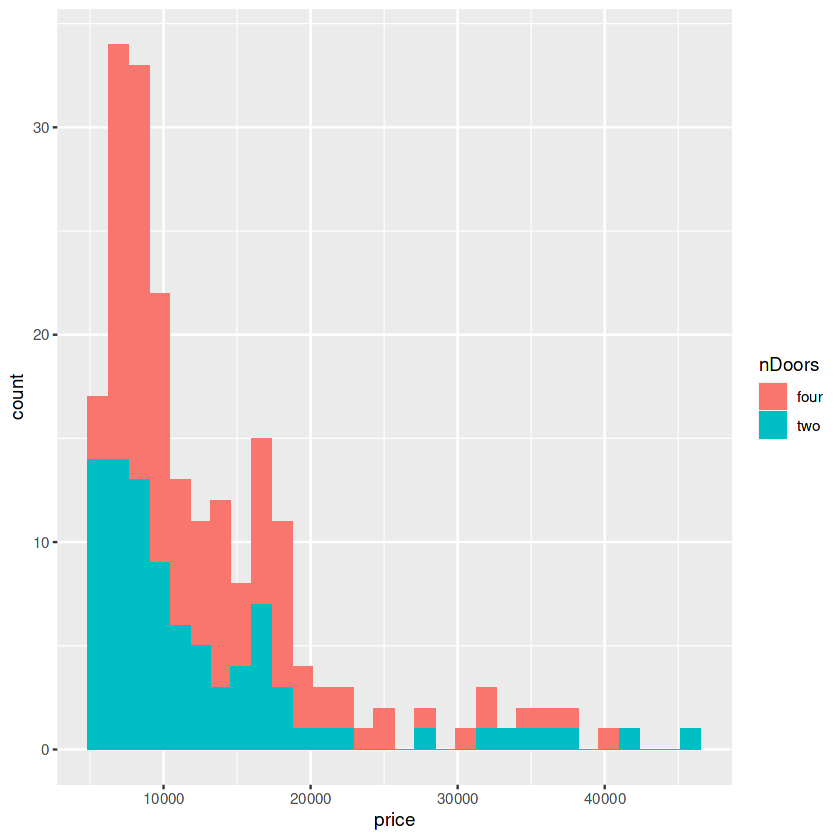

In [87]:
#Show the distribution of price by nDoors attribute. Suggestion: use histograms.

data <- load("/kaggle/input/carlrdata/carIns_final.Rdata")

ggplot(data = carIns_final, mapping = aes(x = price , fill = nDoors)) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


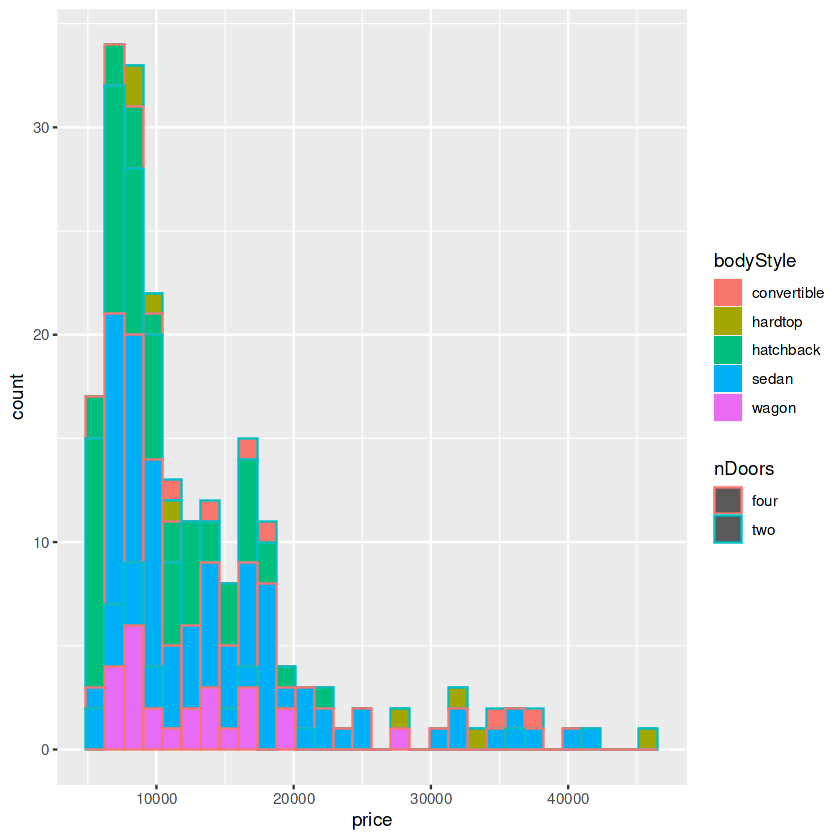

In [92]:
#Show the distribution of price by bodyStyle and nDoors attributes. Suggestion: use histograms.

data <- load("/kaggle/input/carlrdata/carIns_final.Rdata")

ggplot(data = carIns_final, mapping = aes(x = price , fill = bodyStyle, color=nDoors)) + geom_histogram()

#ggplot(data = carIns_final, mapping = aes(x = price , fill = nDoors)) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


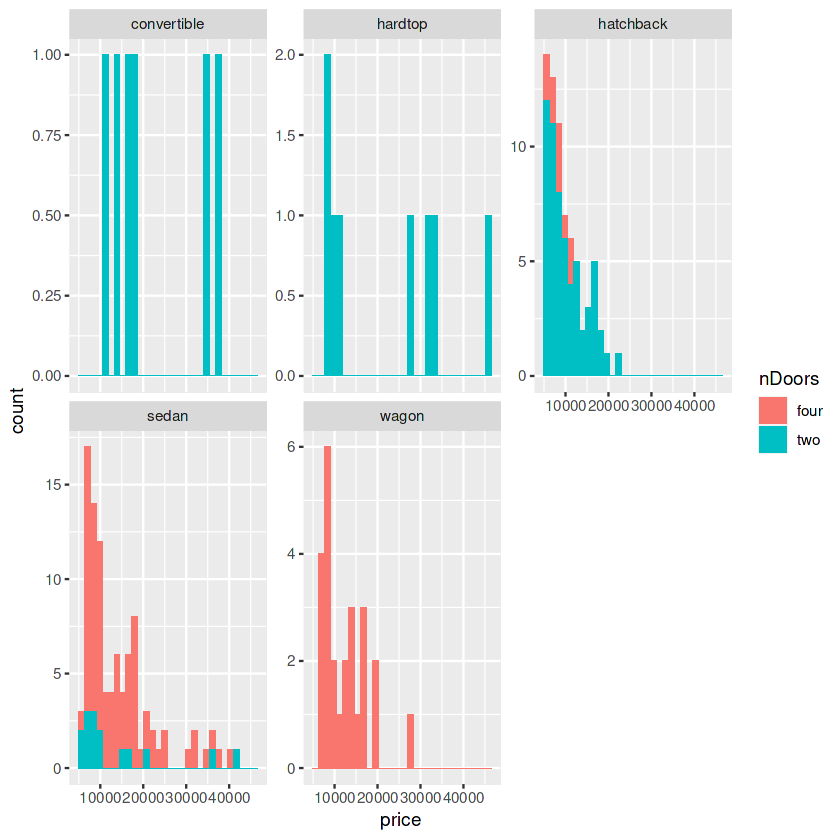

In [99]:
#Add the parameter scales="free_y" to the facet function in the previous graph.

data <- load("/kaggle/input/carlrdata/carIns_final.Rdata")

ggplot(data = carIns_final, mapping = aes(x = price , fill=nDoors)) + geom_histogram()+facet_wrap(~bodyStyle,scales="free_y")